Consumption & Production rate

In [7]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from arguments import get_args
import numpy as np

args = get_args()

algos = ["alg0", "alg1", "alg2", "alg3"]

datapath = "cons_prod_rate/"
savepath = "24_2_12_cons_prod_rate/"
if not os.path.exists(savepath):
    os.makedirs(savepath)

Namespace(exp_name='nh3', lattice_size=50, sim_round=10000000, num_samples=50, end_time=0.00011, alg1_lambda=1.5e-09, alg2_lambda=1, alg3_lambda=0.01, tau_max=1e-08, algo=1, path='24_2_1_alg1/')


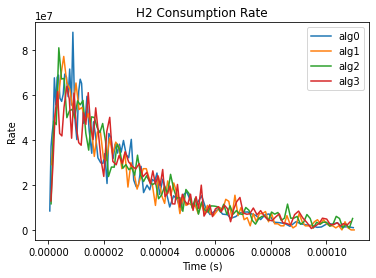

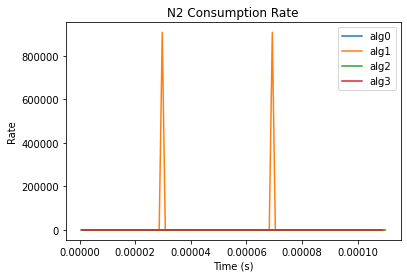

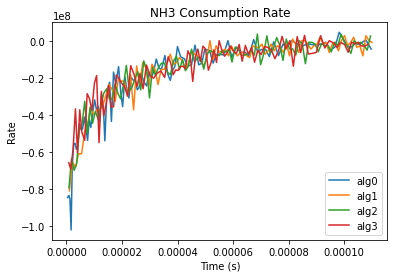

<Figure size 432x288 with 0 Axes>

In [8]:
for specie_idx in range(len(args.sim.species_names)):
    
    if args.sim._init_state[specie_idx] != 0: # ignore species that stay on the surface
        continue
    
    for idx, algo in enumerate(algos):
        
        file_name = os.path.join(datapath, f"{algo}_size_{args.lattice_size}_sample_{args.num_samples}_{args.sim.species_names[specie_idx]}_cprate.txt")
        
        if not os.path.exists(file_name):
            print(f"{file_name} does not exist, ignored")
            continue
        
        with open(file_name, 'r') as file:
            lines = file.readlines()

        
        for i, line in enumerate(lines):
            if "res in list" in line:
                list_line = lines[i+1]
                break
        try:
            rates = eval(list_line)
        except Exception as e:
            print(f"error when evaluating list: {e}")

        # read taus from file
        for i, line in enumerate(lines):
            if "taus in list" in line:
                list_line = lines[i+1]
                break
        try:
            taus = eval(list_line)
        except Exception as e:
            print(f"error when evaluating list: {e}")

        # read cumulated times from file
        for i, line in enumerate(lines):
            if "cumu times in list" in line:
                list_line = lines[i+1]
                break
        try:
            times = eval(list_line)
        except Exception as e:
            print(f"error when evaluating list: {e}")


        taus = np.array(taus)
        # The logic of the following code is to divide the total time into 100 segments. 
        # For each segment, the number of gas generations/consumptions is calculated to obtain the corresponding rate for each segment.
        n = len(times) // 100
        x_values = []
        y_rates = []
        for i in range(100):
            start_idx = i * n  # find segment's start index
            end_idx = (i + 1) * n  # find segment's end index
            x_partition = times[start_idx:end_idx]
            y_partition = rates[start_idx:end_idx] * taus[start_idx:end_idx]
            x_value = x_partition[-1]  # record last time stamp for plot
            y_rate = sum(y_partition) /  (times[end_idx] - times[start_idx]) # cons/prod rate
            x_values.append(x_value)
            y_rates.append(y_rate)



        plt.plot(x_values, y_rates, label=algos[idx])

    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("Rate")
    sp_name = args.sim.species_names[specie_idx]
    if sp_name.endswith("_g"):
        sp_name = sp_name[:-2]
    if np.min(rates) >= 0:
        plt.title(f"{sp_name} Production Rate")
    else:
        plt.title(f"{sp_name} Consumption Rate")
    
    plt.savefig(os.path.join(savepath, f"{sp_name}.png"))
    plt.savefig(os.path.join(savepath, f"{sp_name}.pdf"))
    plt.show()
    plt.clf()